# Observation Analysis:
    The bar graph showed the Drug Regimen Capomulin has the maximum mice number (230), and 
    Propriva has the smaller mice number (182). By removing duplicates the total number of mice is 248. 
    The total count of mice by gender also showed that 124 female mice and 125 male mice. 
    The correlation between mouse weight, and average tumor volume is a strong positive correlation, 
    when the mouse weight increases the average tumor volume also increases. 
    The regression analysis helped to understand how much the average tumor volume (dependent variable)
    will change when weight of mice change(independent variables). 
    From the selected treatments Capomulin and Ramicane reduces the size of 0.84 tumors better.

In [66]:
%matplotlib notebook

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results=pd.merge( study_results,mouse_metadata,how="left", on=["Mouse ID","Mouse ID"])
# Display the data table for preview
mouse_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [68]:
# Checking the number of mice.
mice_numbe=mouse_study_results["Mouse ID"].nunique()
mice_numbe

249

In [69]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dups = mouse_study_results[mouse_study_results.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mouse_ids=dups["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [70]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mice =mouse_study_results.loc[mouse_study_results["Mouse ID"]== "g989",:]
dup_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [71]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanData=mouse_study_results[mouse_study_results["Mouse ID"].isin(duplicate_mouse_ids)==False]
cleanData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [72]:
# Checking the number of mice in the clean DataFrame.
clean_mice= cleanData["Mouse ID"].value_counts()
clean_number_of_mice= len(clean_mice)
clean_number_of_mice

248

In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mouse_m = mouse_study_results.groupby("Drug Regimen")
drug_tumor=mouse_m['Tumor Volume (mm3)']
mean =drug_tumor.mean()
median =  drug_tumor.median()
var =  drug_tumor.var()
std= drug_tumor.std()
sem = drug_tumor.sem()

# Assemble the resulting series into a single summary dataframe.
resulting_series = pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,
                                         "Tumor Volume Variance":var,"Tumor Volume Std. Dev.":std,
                                        "Tumor Volume Std. Err.":sem})
resulting_series

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [74]:
# Using the aggregation method, produce the same summary statistics in a single line
resulting_series_agg= mouse_study_results.groupby("Drug Regimen")[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])                               
resulting_series_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [75]:
#first create a group series using the 'Drug Regimen' column and, counting the number of data points for each Drug Regimen 
mice_count = cleanData["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

<IPython.core.display.Javascript object>


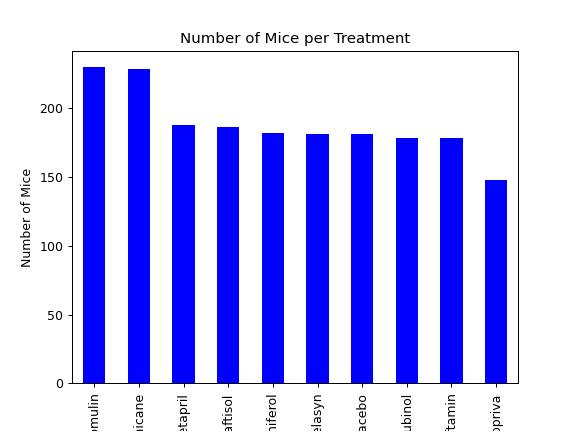

In [76]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plt.close()
plot_pandas = mice_count.plot.bar(color='b')
#mouse_t_d = mouse_study_results.groupby("Drug Regimen")["Timepoint"].count()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")
#mouse_t_d.plot(kind="bar")
plt.show()

<IPython.core.display.Javascript object>


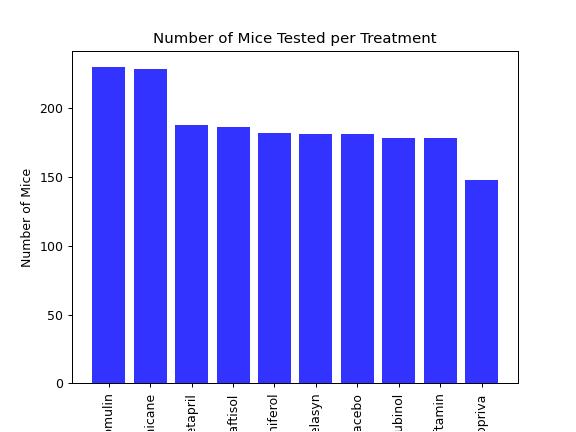

In [77]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.close()
x_axis=mice_count.index.values
y_axis= mice_count.values
plt.bar(x_axis, y_axis, color='blue', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

<IPython.core.display.Javascript object>


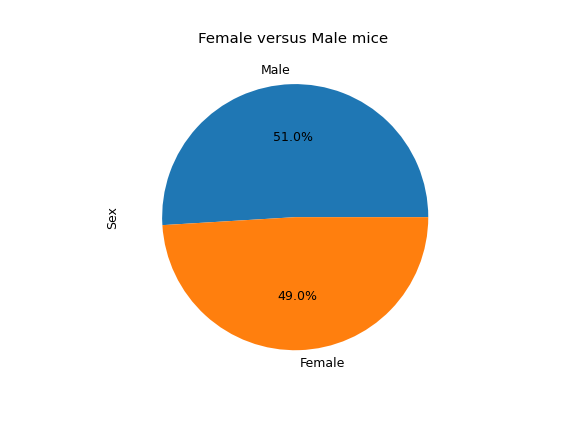

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.close()
mouse_sex=cleanData["Sex"].value_counts()
mouse_sex.plot(kind="pie",autopct="%1.1f%%")
plt.title("Female versus Male mice ")
plt.show()

<IPython.core.display.Javascript object>


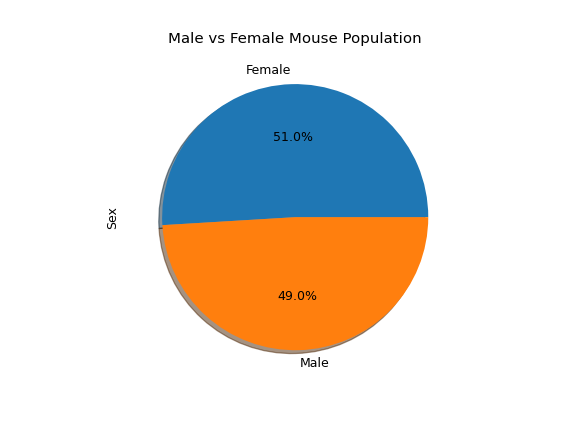

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.close()
sex_name=["Female","Male"]
plt.pie(mouse_sex,labels=sex_name, autopct="%1.1f%%", shadow=True)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

In [80]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
options = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

max_timepoint = study_results.sort_values('Timepoint', ascending=False).drop_duplicates(['Mouse ID'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_data=pd.merge(mouse_metadata, max_timepoint, on="Mouse ID")

filtered_max_data = max_data[max_data['Drug Regimen'].isin(options)]
filtered_max_data[["Mouse ID","Tumor Volume (mm3)", "Drug Regimen"]]

,Mouse ID,Tumor Volume (mm3),Drug Regimen
0,k403,22.050126,Ramicane
1,s185,23.343598,Capomulin
2,x401,28.484033,Capomulin
3,m601,28.430964,Capomulin
4,g791,29.128472,Ramicane
...,...,...,...
235,x822,61.386660,Ceftamin
237,y163,67.685569,Infubinol
241,y769,68.594745,Ceftamin
242,y865,64.729837,Ceftamin


In [81]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
data = []
for treatment in (['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']):
   
    data = filtered_max_data[(filtered_max_data['Drug Regimen'] == treatment)]["Tumor Volume (mm3)"]
    quartiles = data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_range = lowerq - (1.5*iqr)
    upper_range = upperq + (1.5*iqr)

    outliers = [x for x in data if ((x < lower_range) or (x > upper_range))]
    
    
    print(f"({treatment} )  potential outliers: {outliers}")
    #print(outliers)
    print(f"The lower quartile of is: {lowerq}")
    print(f"The upper quartile of is: {upperq}")
    print(f"The interquartile range of is: {iqr}")
    print(f"The the median of  is: {quartiles[0.5]} ")

    print(f"Values below {lower_range} could be outliers.")
    print(f"Values above {upper_range} could be outliers.")
    print("-------------------------------------------------------------\n")
    

(Capomulin )  potential outliers: []
The lower quartile of is: 32.37735684
The upper quartile of is: 40.1592203
The interquartile range of is: 7.781863460000004
The the median of  is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-------------------------------------------------------------

(Ramicane )  potential outliers: []
The lower quartile of is: 31.56046955
The upper quartile of is: 40.65900627
The interquartile range of is: 9.098536719999998
The the median of  is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-------------------------------------------------------------

(Infubinol )  potential outliers: [36.3213458]
The lower quartile of is: 54.04860769
The upper quartile of is: 65.52574285
The interquartile range of is: 11.477135160000003
The the median of  is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 co

<IPython.core.display.Javascript object>


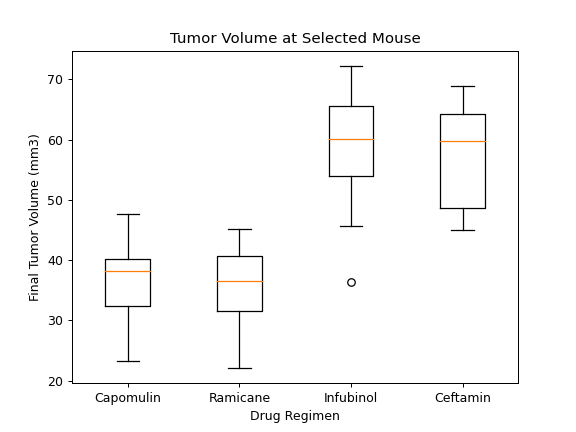

In [82]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.close()
capomulin = filtered_max_data[(filtered_max_data['Drug Regimen'] == 'Capomulin')]["Tumor Volume (mm3)"]
ramicane = filtered_max_data[(filtered_max_data['Drug Regimen'] == 'Ramicane')]["Tumor Volume (mm3)"]
infubinol = filtered_max_data[(filtered_max_data['Drug Regimen'] == 'Infubinol')]["Tumor Volume (mm3)"]
ceftamin = filtered_max_data[(filtered_max_data['Drug Regimen'] == 'Ceftamin')]["Tumor Volume (mm3)"]

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [capomulin, ramicane, infubinol, ceftamin]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=Regimen,widths = 0.4, vert=True)
plt.show()


<IPython.core.display.Javascript object>


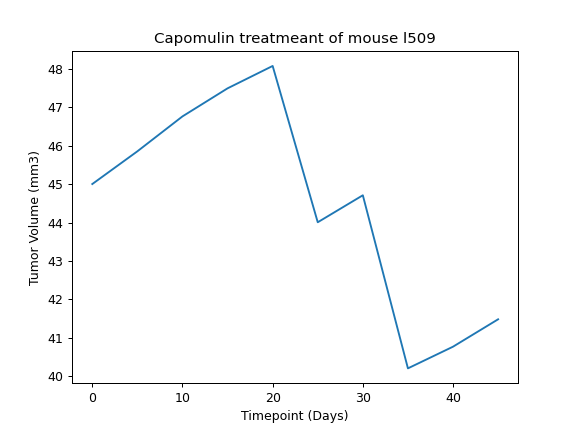

In [83]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.close()
capomulin = mouse_study_results[(mouse_study_results['Drug Regimen'] == 'Capomulin')]
capomulin_for_l509 = capomulin[capomulin["Mouse ID"] == 'l509']
capomulin_y = capomulin_for_l509["Tumor Volume (mm3)"]
capomulin_x = capomulin_for_l509["Timepoint"]
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(capomulin_x, capomulin_y)

#plt.show()

<IPython.core.display.Javascript object>


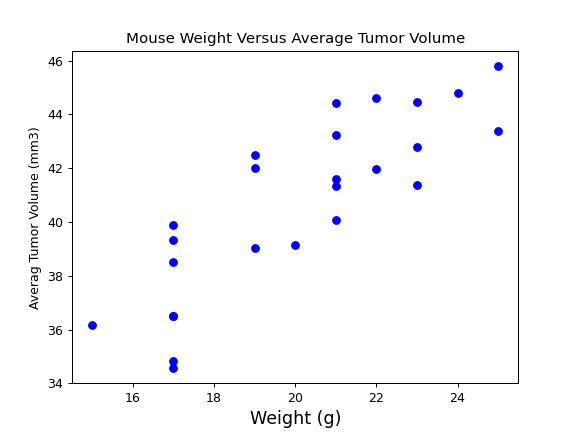

In [84]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.close()

Capomulin_df = cleanData.loc[cleanData["Drug Regimen"] == "Capomulin",:]
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()
marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

plt.show()

In [85]:
# Calculate the correlation coefficient and linear regression model 

correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
correlation 
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


<IPython.core.display.Javascript object>


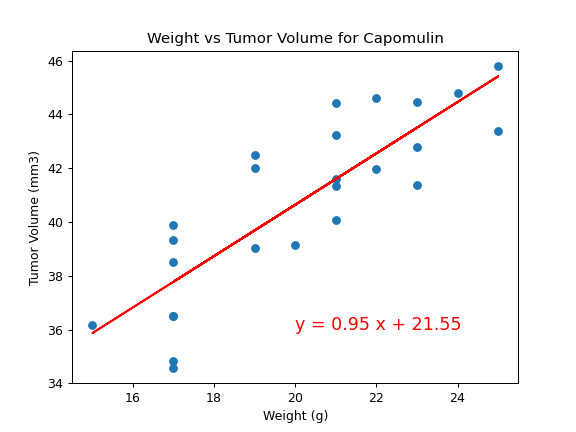

The r-squared is: 0.709


In [87]:
# for mouse weight and average tumor volume for the Capomulin regimen
plt.close()
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'])
regress_values =avg_capm_vol['Weight (g)'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
plt.plot(avg_capm_vol['Weight (g)'],regress_values,"r-")

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.annotate(line_eq,(20,36), fontsize=14, color ="red")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.title("Weight vs Tumor Volume for Capomulin")
#print(f"The r-squared is: {rvalue**2}")
plt.show()